<span style="font-size: 20pt;"><span style="font-weight: bold;">Chapter 2.</span> The Series: Taming the Distribution</span>

Last update: 12 January 2024 

Thank you for checking out the code for: 

> Hogan, Bernie (2023) _From Social Science to Data Science_. London, UK. Sage Publications. 

This notebook contains the code from the book, along with the headers and additional author notes that are not in the book as a way to help navigate the code. You can run this notebook in a browser by clicking the buttons below. 
    
The version that is uploaded to GitHub should have all the results pasted, but the best way to follow along is to clear all outputs and then start afresh. To do this in Jupyter go the menu and select "Kernel -> Restart Kernel and Clear all Outputs...". To do this on Google Colab go to the menu and select "Edit -> Clear all outputs".
    
The most up-to-date version of this code can be found at https://www.github.com/berniehogan/fsstds 

Additional resources and teaching materials can be found on Sage's forthcoming website for this book. 

All code for the book and derivative code on the book's repository is released open source under the  MIT license. 
    

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/berniehogan/fsstds/main?filepath=chapters%2FCh.02.WranglingI_TheSeries.ipynb)[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berniehogan/fsstds/blob/main/chapters/Ch.02.WranglingI_TheSeries.ipynb)

<span style="font-size: 20pt;">📺 YouTube Video lecture for this chapter 📺</span>

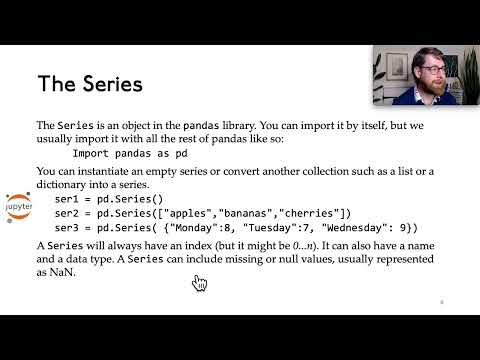

In [62]:
from IPython.display import YouTubeVideo

YouTubeVideo('LNT6zW29xfE')

# Introducing the Series: Python's way to store a distribution

In [1]:
import pandas as pd 

In [2]:
lweekdays = ["Monday","Tuesday","Wednesday","Thursday",
             "Friday","Saturday","Sunday"]

In [3]:
sweekdays = pd.Series(lweekdays,name="Weekdays")

display(sweekdays)

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
5     Saturday
6       Sunday
Name: Weekdays, dtype: object

In [4]:
dsleephours =  {"Sunday":8.5,
                "Monday":7,
                "Tuesday":5,
                "Wednesday":6.5,
                "Thursday":7.5,
                "Friday":9,
                "Saturday":8}

sleephours = pd.Series(dsleephours, name="SleepHours")

display(sleephours) 

print(f"The length of the series is {len(sleephours)}.")

Sunday       8.5
Monday       7.0
Tuesday      5.0
Wednesday    6.5
Thursday     7.5
Friday       9.0
Saturday     8.0
Name: SleepHours, dtype: float64

The length of the series is 7.


## Working from index

In [5]:
display(sleephours["Tuesday"])

# OR

display(sleephours[2])

5.0

5.0

In [6]:
sleephours.dtype

dtype('float64')

In [7]:
x = pd.Series([True, False])
print(x.dtype)

y = pd.Series(["Left","Right","Up","Down"])
print(y.dtype)

bool
object


In [8]:
# Turn 4 into a string to see what sleephours[4] returns then. 
sleephours = pd.Series({4:8.5,
                "Monday":7,"Tuesday":5,"Wednesday":6.5,
                "Thursday":7.5,"Friday":9,"Saturday":8})

display(sleephours[4]) 
display(sleephours["Thursday"]) 

8.5

7.5

In [9]:
ser1 = pd.Series(["a","b","c","d","e"])
print(ser1)

0    a
1    b
2    c
3    d
4    e
dtype: object


In [10]:
del ser1[2] 
print(ser1) # Notice that the index is now 0,1,3,4

0    a
1    b
3    d
4    e
dtype: object


In [11]:
ser1.index = pd.RangeIndex(len(ser1))
print(ser1) # Now the index should be back to 0,1,2,3

0    a
1    b
2    d
3    e
dtype: object


## Working from values (and masking)

In [12]:
sleephours = pd.Series({"Sunday":8.5,
                "Monday":7,
                "Tuesday":5,
                "Wednesday":6.5,
                "Thursday":8,
                "Friday":9.5,
                "Saturday":8})

display(sleephours < 7)

Sunday       False
Monday       False
Tuesday       True
Wednesday     True
Thursday     False
Friday       False
Saturday     False
dtype: bool

In [13]:
sleepmask = sleephours < 7

display(sleephours[sleepmask])

Tuesday      5.0
Wednesday    6.5
dtype: float64

In [14]:
days_sleep = len(sleephours[sleepmask])
total_days = len(sleephours)
avg_per_day = days_sleep/total_days

print(avg_per_day) 

# Or in a more tidy format, where we treat the output as a float
# and ask for only two significant digits.
# This is an "f-insertion". I will be using a lot of these.
print(f"{avg_per_day:.2f}")

0.2857142857142857
0.29


### Multiple masks at the same time

In [15]:
sleephours[sleephours < 7 or sleephours > 9] # Run this to get an error

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [16]:
sleephours[sleephours < 7 | sleephours > 9] # Run this to get a long error

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

In [17]:
sleephours[(sleephours < 7) | (sleephours > 9)] # This should run fine.

Tuesday      5.0
Wednesday    6.5
Friday       9.5
dtype: float64

## Working from distributions 

### Value counts

In [18]:
display(sleephours.value_counts())

8.0    2
8.5    1
7.0    1
5.0    1
6.5    1
9.5    1
dtype: int64

In [19]:
display(sleephours.value_counts().sort_index(ascending=False))

9.5    1
8.5    1
8.0    2
7.0    1
6.5    1
5.0    1
dtype: int64

In [20]:
(sleephours > 7).value_counts()

True     4
False    3
dtype: int64

In [21]:
display(sleephours.max())

display(max(sleephours))

9.5

9.5

In [22]:
display(sleephours.mean())

try: 
    display(mean(sleephours))
except: 
    print("This did not work as planned.")

7.5

This did not work as planned.


## Adding data to a Series 

### Adding a single element to a Series 

In [23]:
ex_ser = pd.Series(["Toast","Salad","Pastry"])
ex_ser[len(ex_ser)] = "Pizza"
display(ex_ser);

0     Toast
1     Salad
2    Pastry
3     Pizza
dtype: object

In [24]:
if 2 not in ex_ser: 
    ex_ser[2] = "Hamburgers"

if 4 not in ex_ser: 
    ex_ser[4] = "Cookies"

display(ex_ser)

0      Toast
1      Salad
2     Pastry
3      Pizza
4    Cookies
dtype: object

### Adding multiple data to a Series

In [25]:
ser_m = pd.Series(["Kermit", "Piggy", "Gonzo"],name="Muppets")
ser_s = pd.Series(["Oscar", "Ernie", "Big Bird"],name="Sesame Street")
ser_f = pd.Series(["Mokey","Red","Boober"],name="Fraggles")

new_ser = pd.concat([ser_m,ser_s,ser_f])
display(new_ser)

0      Kermit
1       Piggy
2       Gonzo
0       Oscar
1       Ernie
2    Big Bird
0       Mokey
1         Red
2      Boober
dtype: object

In [26]:
new_ser[1]

1    Piggy
1    Ernie
1      Red
dtype: object

In [27]:
new_ser = pd.concat([ser_m,ser_s,ser_f],ignore_index=True)
new_ser.name = "Muppets"
display(new_ser)

0      Kermit
1       Piggy
2       Gonzo
3       Oscar
4       Ernie
5    Big Bird
6       Mokey
7         Red
8      Boober
Name: Muppets, dtype: object

## Deleting Data from a Series

### Deleting a single element 

In [28]:
sdemo = pd.Series(["Kermit","Piggy","Fozzie"],name="Before")
display(sdemo)

del sdemo[1]
sdemo.name = "After"
display(sdemo)

0    Kermit
1     Piggy
2    Fozzie
Name: Before, dtype: object

0    Kermit
2    Fozzie
Name: After, dtype: object

### Deleting multiple data in a Series

In [29]:
ser_old = pd.Series([3,5,7,9,11,14])
ser_new = ser_old[ser_old >= 5]
ser_new

1     5
2     7
3     9
4    11
5    14
dtype: int64

## Working with missing data in a Series 

In [30]:
smuppet = pd.Series(index=[0,1,2,3],dtype=object)
smuppet[0] = "Kermit"
smuppet[3] = "Fozzie"
display(smuppet)

0    Kermit
1       NaN
2       NaN
3    Fozzie
dtype: object

In [31]:
# Filling the N/A values
display(smuppet.fillna("extra"))

0    Kermit
1     extra
2     extra
3    Fozzie
dtype: object

In [32]:
# Dropping the N/A values
display(smuppet.dropna())

0    Kermit
3    Fozzie
dtype: object

In [33]:
# Masking the NA values
display(smuppet[smuppet.notna()])

0    Kermit
3    Fozzie
dtype: object

## Getting unique values in a Series

In [34]:
ser1 = pd.Series(["Kermit","Fozzie","Kermit","Piggy","Fozzie"])
display(ser1.unique())

ser2 = pd.Series(ser1.unique()) # To transform back to a Series
display(ser2)

array(['Kermit', 'Fozzie', 'Piggy'], dtype=object)

0    Kermit
1    Fozzie
2     Piggy
dtype: object

# Changing a Series

## Changing the order of items in the Series

In [35]:
ser1 = pd.Series( {"Kermit":"Frog",
                   "Piggy":"Pig",
                   "Fozzie":"Bear",
                   "Robin":"Frog"} )

ser1.sort_values(ascending=True,inplace=True)
display(ser1)

Fozzie    Bear
Kermit    Frog
Robin     Frog
Piggy      Pig
dtype: object

In [36]:
ser2 = ser1.sort_index(ascending=False)
display(ser2)

Robin     Frog
Piggy      Pig
Kermit    Frog
Fozzie    Bear
dtype: object

## Changing the Type of the Series 

In [37]:
sdemo = pd.Series([1,3,4,5])
display(sdemo)

0    1
1    3
2    4
3    5
dtype: int64

In [38]:
display(sdemo.astype(float) + 2)
display(sdemo.astype(str) + "2")

0    3.0
1    5.0
2    6.0
3    7.0
dtype: float64

0    12
1    32
2    42
3    52
dtype: object

In [39]:
sdemo = pd.Series([1,"three",4,"five point five"])
display(sdemo.astype(float,errors="ignore"))
display(sdemo.astype(str) + "2")

0                  1
1              three
2                  4
3    five point five
dtype: object

0                  12
1              three2
2                  42
3    five point five2
dtype: object

In [40]:
display(pd.to_numeric(sdemo, errors="coerce"))

0    1.0
1    NaN
2    4.0
3    NaN
dtype: float64

## Changing Series values I: Arithmetic operators

In [41]:
import numpy as np 

ser1 = pd.Series([1,np.NaN,7])
display(ser1)

0    1.0
1    NaN
2    7.0
dtype: float64

In [42]:
display(ser1*2)

0     2.0
1     NaN
2    14.0
dtype: float64

In [43]:
display(ser1-4)

0   -3.0
1    NaN
2    3.0
dtype: float64

In [44]:
ser2 = pd.Series(["Kermit","Piggy","Fozzie"])
display(ser2 + " the Muppet")

0    Kermit the Muppet
1     Piggy the Muppet
2    Fozzie the Muppet
dtype: object

## Changing Series Values II: Recoding values using Map

In [45]:
gender_series = pd.Series(['Male', 'Man', 'Male (sex)', 'Woman', 'Female',
               'Female ', 'Female ', 'Male', 'Male', 'Woman',
               'Female', 'Man', 'Male', 'Woman'])

print(len(gender_series))
print(gender_series.unique())

14
['Male' 'Man' 'Male (sex)' 'Woman' 'Female' 'Female ']


In [46]:
gender_recode_dict = {"Male":"M", 
                 # "Man":"M", # I'm leaving this out to show what happens
                 "Male (sex)": "M",
                 "Woman":"F",
                 "Female":"F",
                 "Female ":"F"}

In [47]:
gender_recode = gender_series.map(gender_recode_dict)
gender_recode.value_counts(dropna = False)

F      7
M      5
NaN    2
dtype: int64

## Changing Series Values III: Defining your own mapping

In [48]:
schars = pd.Series(["A","B","C"])
schars_lower = schars.map({"A":"a","B":"b","C":"c"})
display(schars_lower)

0    a
1    b
2    c
dtype: object

In [49]:
"A".lower()

'a'

In [50]:
schars = pd.Series(["A","B","C"])
schars.map(lambda x: x.lower())

0    a
1    b
2    c
dtype: object

### Using functions inside of lambda 

In [51]:
def transformWord(word):
    return word[0].lower()

schars = pd.Series(["Alpha","Bravo","Charlie"])
new_series = schars.map(transformWord)
display(new_series)


0    a
1    b
2    c
dtype: object

In [52]:
def transformWord(word,wholeWord=False):
    if wholeWord: 
        return word.lower()
    else:
        return word[0].lower()

new_series = schars.map(lambda x: transformWord(x, wholeWord=True))
display(new_series)

0      alpha
1      bravo
2    charlie
dtype: object

# Summary: The Series 

# Extensions and reflections